# 기계학습 기말프로젝트
### 2020131017 장윤태

프로젝트 주제 : 시각장애인을 위한 음료수 제품명 판독 <br>

프로젝트 동기 : 시각장애인 유튜버가 편의점 혹은 집에 있는 음료수를 섭취하려고 했을 때 외형적으로 특징이 잘 나타나는 음료수는 기억으로 구분할 수 있지만 캔음료수나 외형적인 특징이 잘 나타나지 않는 음료수는 구분하기 힘들다는 내용을 영상으로 찍어서 올렸다. 점자로 알 수 있지 않느냐 해도 점자는 탄산, 이온과 같은 종류만 명시돼 있을 뿐 정확하지 않아 불편하다고 하였다. 그래서 머신러닝으로 제품명을 판독할 수 있지 않을까 하여 시작하였다. <br>
참고용 유튜브 링크 https://www.youtube.com/watch?v=PDDyhWiIZsE <br>

프로젝트 과정 : 음료수 여러 제품별로 이미지를 크롤링한 뒤 전처리한다. 케라스의 conv2d를 이용해 이미지를 머신러닝할 수 있는 모델을 구축한다. 구축한 모델에 이미지를 넣어 학습시킨 뒤 사이트로 개설하고 웹뷰어 형식의 어플로도 출시한다.

In [ ]:
#구글드라이브 마운트 설정 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. 패키지 임포트

In [ ]:
#구글에서 이미지 다운받는 패키지 다운
!pip install git+https://github.com/Joeclinton1/google-images-download.git

#셀레늄 패키지 다운
!pip install selenium

#ubuntu 업데이트
!apt-get update

#크롬드라이브 다운
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-w_o4efes
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-w_o4efes
     |████████████████████████████████| 958 kB 15.0 MB/s 
     |████████████████████████████████| 138 kB 71.3 MB/s 
     |████████████████████████████████| 356 kB 60.8 MB/s 
     |████████████████████████████████| 3.6 MB 44.6 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15969 sha256=92f083d5cdfa5a837202dba4c17900beb1e6caa797ec7546c4abf3548f7ef066
  Stored in directory: /tmp/pip-ephem-wheel-cache-56ruqcp9/wheels/79/5c/d2/2569a4f55ff29b3c4d6b1114d5110a70a79afbf381e6eb3e87
Successfully built google-images-download
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Un

In [ ]:
#웹사이트로부터 html문서 요청 패키지 불러오기
import requests

#크롤링한 사진을 저장하는 함수 불러오기
from urllib.request import urlretrieve

#정규식 지정 패키지 불러오기
import re

#로컬 파일 접속 패키지 불러오기
import os

#python 인터프리터, 함수 직접 제거 패키지 불러오기
import sys

#시간 관련 작업을 할 수 있는 패키지 불러오기
import time

#html문서에서 추출 함수 불러오기
from bs4 import BeautifulSoup

#원격으로 동적 브라우저 작동시키는 함수 불러오기
from selenium import webdriver

#키보드 자판을 입력할 수 있는 셀레늄 함수 불러오기
from selenium.webdriver.common.keys import Keys

#구글 사이트에서 이미지 다운로드 함수 불러오기
from google_images_download import google_images_download

#데이터를 처리할 프레임 패키지 불러오기
import pandas as pd

#수학 연산을 처리할 패키지 불러오기
import numpy as np

#그래프와 같은 그림 그리는 패키지 불러오기
import matplotlib.pyplot as plt

#텐서플로우 패키지 불러오기
import tensorflow as tf

#케라스 패키지 불러오기
import keras

#케라스 모델 중 conv2d 모델 default 설정 함수 불러오기
from functools import partial

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


#2-1. 이미지 크롤링(google_images_download 패키지 활용)

In [ ]:
#구글이미지다운로드 함수 호출
response = google_images_download.googleimagesdownload()

#이미지 다운받을 경로 지정
dir = '/content/drive/MyDrive/data'

#다운받을 이미지 이름, 개수, 경로 설정
arguments = {'keywords' : '코카콜라,칠성사이다,환타오렌지,환타포도,펩시,미란다오렌지,미란다파인애플,파워에이드,밀키스', 'limit' : 100, 'print_urls' : True, 'output_directory' : dir}

#이미지 다운로드
paths = response.download(arguments)


Item no.: 1 --> Item name = \ucf54\uce74\ucf5c\ub77c
Evaluating...
Starting Download...
Image URL: https://blog.kakaocdn.net/dn/tDGUE/btqCOy0qApR/hgBXXnCyitQnkbyYUzF1Bk/img.jpg
Completed Image ====> 1.img.jpg
Image URL: https://blog.kakaocdn.net/dn/y8cRb/btqFfsYhEBj/eux2a7xdDH1HDm3uyK4MIk/img.png
Completed Image ====> 2.img.png
Image URL: http://img.danawa.com/prod_img/500000/236/157/img/3157236_1.jpg?shrink=330:330&_v=20200326111802
Completed Image ====> 3.3157236_1.jpg
Image URL: https://www.upinews.kr/data/upi/image/2019/12/26/upi201912260193.560x.null.jpg
Completed Image ====> 4.upi201912260193.560x.null.jpg
Image URL: https://post-phinf.pstatic.net/MjAxOTA4MTRfMTMg/MDAxNTY1NzgyNTE2Nzc4.XYoSO0zEYisa-ohyKHl2ezalN5iT_qednDAS0wnc4IIg.GJrzDri7LyKKST2g4pocWfJJlSH8xu4Wq6ho_pkmpZYg.JPEG/0000006613866_i1_1200.jpg?type=w1200
Completed Image ====> 5.0000006613866_i1_1200.jpg
Image URL: http://img.danawa.com/prod_img/500000/499/722/img/1722499_1.jpg?shrink=330:330&_v=20200616101126
Completed

#2-2. 이미지 크롤링(bs4, selenium 패키지 활용)

In [ ]:
#크롬드라이버 경로 설정
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

#코랩에서 작동하도록 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

#드라이버 객체 생성
browser = webdriver.Chrome('chromedriver', options = options)

#다운받을 음료수 이미지 반복문 생성
for target in ['코카콜라', '칠성사이다', '환타오렌지', '환타포도', '펩시', '미란다오렌지', '미란다파인애플', '파워에이드', '밀키스']:
  #구글 검색 사이트로 접속
  browser.get('https://www.google.co.kr/')
  #검색창 경로 찾은 후 음료수 제품명 입력 후 엔터
  browser.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys(target)
  browser.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys(Keys.ENTER)
  #이미지 클릭
  browser.find_element_by_xpath('//*[@id="hdtb-msb"]/div[1]/div/div[2]/a').click()
  #현재 문서 높이를 저장
  last_scroll = browser.execute_script('return document.body.scrollHeight')

  #스크롤 시 이미지가 더 많이 생성되므로 자동으로 스크롤 하는 반복문 생성
  while True:
    #페이지 최하단으로 스크롤
    browser.execute_script('window.scrollTo(0, document.body.scrollHegiht);')
    #페이지 로딩 대기
    time.sleep(1)
    #새로운 현재 문서 높이를 저장
    now_scroll = browser.execute_script('return document.body.scrollHeight')
    #현재 높이와 이전 높이가 같은 경우 반복문을 탈출하는 조건문 생성
    if now_scroll == last_scroll:
      #더보기 버튼이 있는 경우 클릭 그 외는 탈출
      try:
        driver.find_element_by_css_selector('.mye4qd').click()
      except:
        break
    #더보기 버튼을 클릭한 경우 이전 높이에 현재 높이를 다시 저장
    last_scroll = now_scroll
  
  #페이지에서 이미지에 해당하는 css 태그를 지정해 이미지 찾기
  images = browser.find_elements_by_css_selector('.rg_i.Q4LuWd')
  #찾은 이미지 개수 초기값 지정
  num = 1
  #이미지들마다 클릭하여 원본 이미지를 불러올 수 있도록 하는 반복문
  for image in images:
    #에러로 인하여 이미지를 불러올 수 없거나 접속이 안되는 경우 pass
    try:
      #이미지 클릭
      image.click()
      #이미지 로딩 대기
      time.sleep(2)
      #이미지 url 지정
      image_url = driver.find_element_by_xpath('/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/c-wiz/div[1]/div[1]/div/div[2]/a/img').get_attribut('src')
      #자동화로 접속할 수 없는 경우 opener 함수로 접속할 수 있게 함수 생성
      opener = urllib.request.build_opener()
      #사용자 헤더 지정
      opener.addheaders = [('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36')]
      #opener 함수로 이미지 접속
      urllib.request.install_opener(opener)
      #확장자와 위치를 설정해 해당 이미지를 다운로드
      urllib.request.urlretrieve(image_url, '/content/drive/MyDrive/data/' + target + '/' + search + str(num) + '.jpg')
      #이미지 개수 1 증가
      num += 1
      #이미지 개수 100개 도달 시 반복문 탈출
      if num == 500:
        break
    except:
      pass

#드라이버 종료
browser.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead


# 3. 데이터 전처리

In [ ]:
#데이터가 저장된 경로 지정
TRAINING_DATA_DIR = ('/content/drive/MyDrive/data')

#생성할 데이터의 사이즈 지정
IMAGE_SHAPE = (224, 224)

#rescale 및 train and test 비율 지정
datagen_kwargs = {'rescale' : 1./255, 'validation_split' : 0.2}

#하이퍼파라미터 지정후 이미지 검증 데이터 전처리
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

#validation 데이터 생성
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset = 'validation',
    shuffle = True,
    batch_size = 60,
    target_size = IMAGE_SHAPE,
    class_mode = 'sparse',
    color_mode = 'rgba'
)

#하이퍼파라미터 지정후 이미지 훈련 데이터 전처리
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

#train 데이터 생성
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset = 'training', 
    shuffle = True,
    batch_size = 60,
    target_size = IMAGE_SHAPE,
    class_mode = 'sparse',
    color_mode = 'rgba'
)

#생성된 데이터의 사이즈가 맞는지 검증
train_image_batch, train_label_batch = next(iter(train_generator))
print(train_image_batch.shape)
print(train_label_batch.shape)
valid_image_batch, valid_label_batch = next(iter(valid_generator))
print(valid_image_batch.shape)
print(valid_label_batch.shape)

Found 180 images belonging to 10 classes.
Found 741 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 4. 
  warnings.warn(str(msg))


(60, 224, 224, 4)
(60,)
(60, 224, 224, 4)
(60,)


#4. 학습 모델 구축

In [ ]:
#모델 이전 학습 과정 제거
keras.backend.clear_session()

#모델 생성
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size = 3, activation = 'relu', padding = "SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters = 64, kernel_size = 7, input_shape = (224, 224, 4)),
    keras.layers.Dropout(0.2),
    keras.layers.MaxPooling2D(pool_size = 2),
    DefaultConv2D(filters = 128),
    keras.layers.Dropout(0.2),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 10, activation = 'softmax'),
])

#생성한 모델 요약 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      12608     
                                                                 
 dropout (Dropout)           (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 dropout_1 (Dropout)         (None, 112, 112, 128)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
#가장 퍼포먼스가 좋은 최적화 알고리즘인 adam 사용 
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)

#다중 클래스 분류 문제이므로 손실함수를 sparse categorical crossentropy로 지정
loss_func = 'sparse_categorical_crossentropy'

#모델 컴파일
model.compile(
  optimizer = optimizer,
  loss = loss_func,
  metrics = ['acc'])

#5. 데이터 학습

In [ ]:
|#학습데이터의 epoch 설정
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)

#검증데이터의 epoch 설정
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

#모델 학습
hist = model.fit(
    train_generator,
    epochs = 30,
    steps_per_epoch = steps_per_epoch,
    validation_data = valid_generator,
    validation_steps = val_steps_per_epoch).history

Epoch 1/30
 2/13 [===>..........................] - ETA: 7:49 - loss: 25.3421 - acc: 0.1235

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 4. 
  warnings.warn(str(msg))


13/13 [==============================] - 404s 32s/step - loss: 14.9659 - acc: 0.0972 - val_loss: 2.3058 - val_acc: 0.1000
Epoch 2/30
13/13 [==============================] - 229s 18s/step - loss: 2.3059 - acc: 0.0904 - val_loss: 2.3054 - val_acc: 0.0944
Epoch 3/30
13/13 [==============================] - 235s 18s/step - loss: 2.3050 - acc: 0.1093 - val_loss: 2.3039 - val_acc: 0.1000
Epoch 4/30
13/13 [==============================] - 235s 18s/step - loss: 2.3039 - acc: 0.1174 - val_loss: 2.3033 - val_acc: 0.1000
Epoch 5/30
13/13 [==============================] - 229s 18s/step - loss: 2.3034 - acc: 0.0972 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 6/30
13/13 [==============================] - 235s 18s/step - loss: 2.3033 - acc: 0.0891 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 7/30
13/13 [==============================] - 236s 18s/step - loss: 2.3033 - acc: 0.1066 - val_loss: 2.3026 - val_acc: 0.1056
Epoch 8/30
13/13 [==============================] - 236s 18s/step - loss: 2.3031 - acc

#6. 모델 평가

모델 학습 결과 정확도가 높지 않으며 학습시키는 시간이 오래 걸린다.
타인이 구축한 모델이 아닌 내가 임의로 구축한 모델이기에 효율적이지 못하다는 점과
구글에서 검색어만으로 이미지를 추출하다보니 음료수 제품과 관련없는 이미지가 추출된다는 점이 원인으로 작용하는 듯 싶다. <br>
또한 내가 지정한 9개 제품명만 지도학습으로 모델을 생성하였기에 제한적이고
추후에 수집한 이미지들을 토대로 비지도학습으로 모델을 생성하면 더욱더 좋지 않을까 생각한다.

In [ ]:
#모델의 최종 loss, accuracy 추출
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

3/3 [==============================] - 14s 4s/step - loss: 2.3025 - acc: 0.1056
Final loss: 2.30
Final accuracy: 10.56%


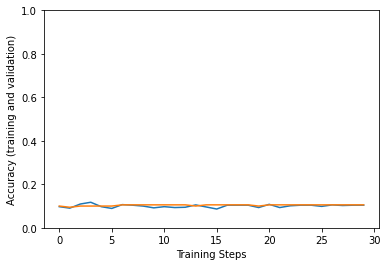

In [ ]:
#학습시킨 모델의 accuracy, val_accuracy값 그래프로 생성
plt.figure()
plt.ylabel('Accuracy (training and validation)')
plt.xlabel('Training Steps')
plt.ylim([0, 1])
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])

#7. 결과 추출

In [ ]:
# 모델 아키텍처를 json 형식으로 저장
json_string = model.to_json('/content/drive/Mydrive/model.json')

# json 파일에서 모델 아키텍처 재구성
model = model_from_json(json_string)

# Weights 따로 저장
model.save_weights('/content/drive/Mydrive/weights.bin')

참조 : 학습 결과값 인덱스<br>
0 : 밀키스, 1 : 파워에이드, 2 : 미란다파인애플, 3 : 미란다오렌지, 4 : 펩시, 5 : 환타포도, 6 : 환타오렌지, 7 : 칠성사이다, 8 : 코카콜라

학습시킨 모델과 가중치는 my_model에 저장 후 drinkingreader 파일을 netlify에 업로드하여 사이트로 서비스 제공

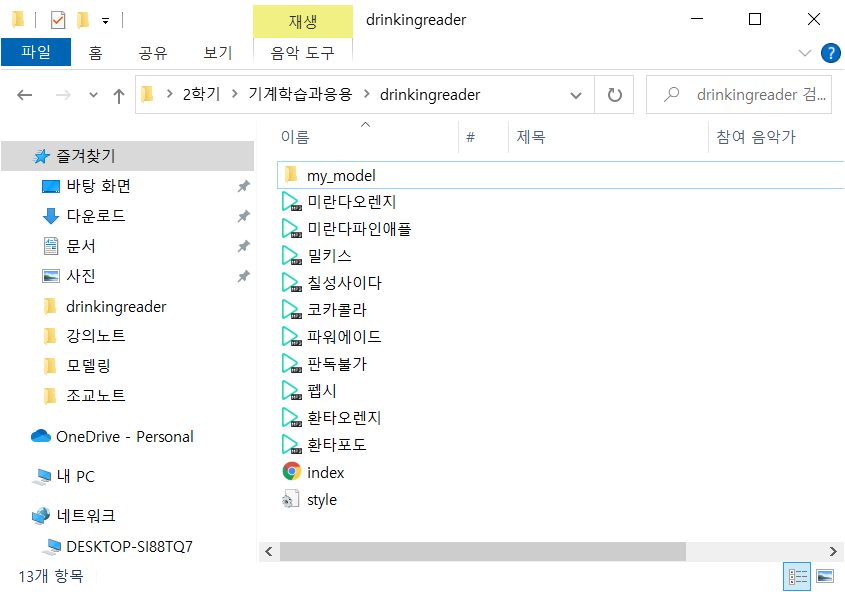

아래의 내용을 명령프롬프트에 입력하여 카카오 음성 변환 api를 활용한 음성 파일 생성하였다. 생성된 음성파일은 제품명 판독 사이트 혹은 어플 파일에 집어넣어 출력이 되도록 활용하였다.

curl -v -X POST "https://kakaoi-newtone-openapi.kakao.com/v1/synthesize" <br>
-H "Content-Type: application/xml" <br>
-H "Authorization: KakaoAK 820433df728f7f9e04376956ee7f12a6" <br>
-d '<speak> <br>
미란다오렌지 <br>
</speak>' > 미란다오렌지.mp3 <br>

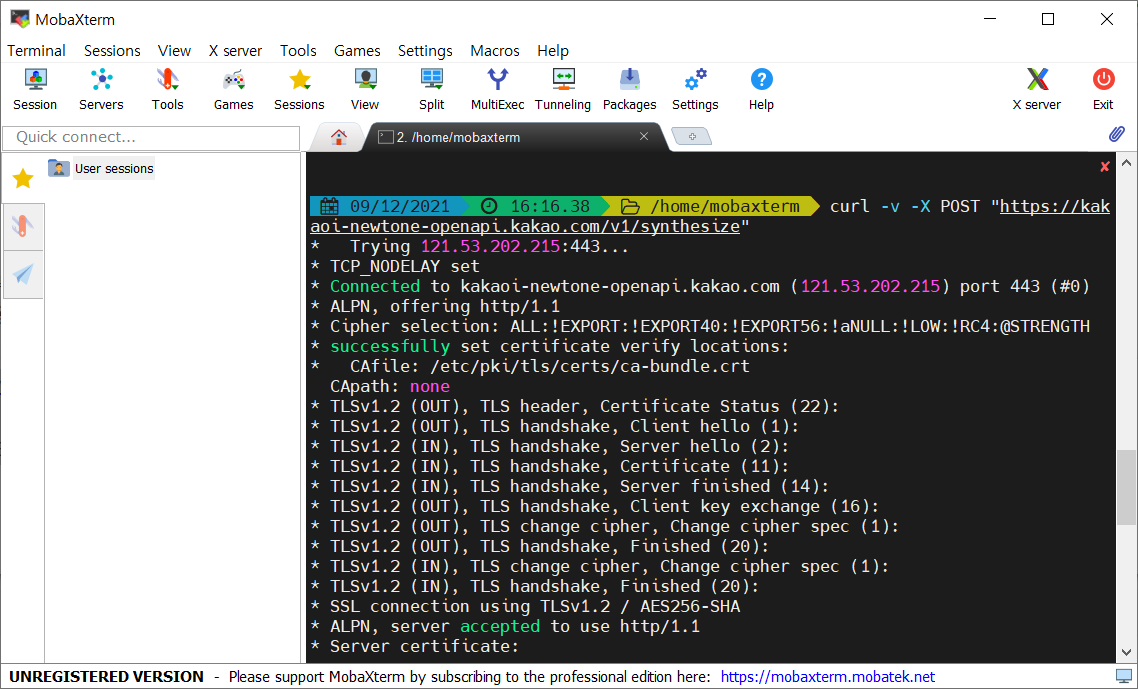

사이트에서 웹캠으로 테스트한 결과 <br>
음성과 함께 펩시콜라인 것이 제대로 추출된다. <br>
사이트 주소 : https://drinkingreader.netlify.app/

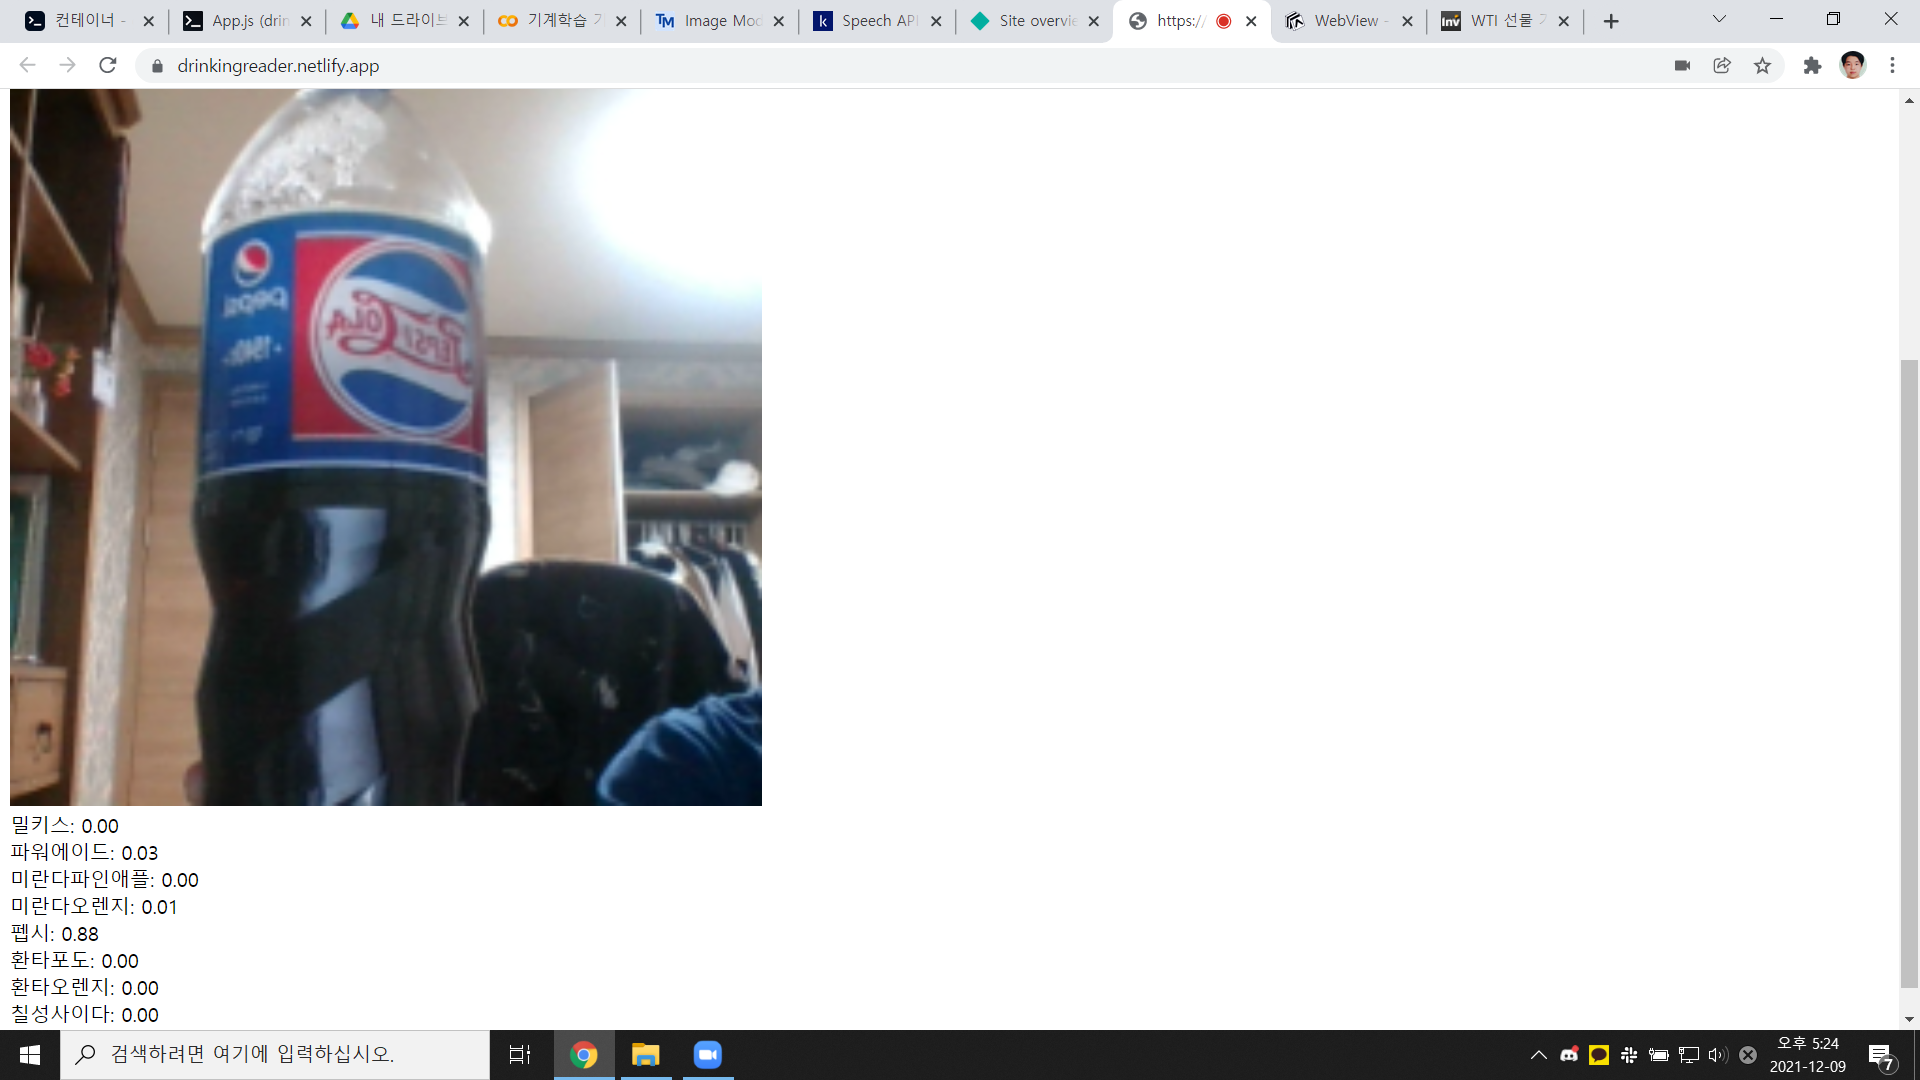

어플(안드로이드)에서 핸드폰 카메라로 테스트한 결과<br>
마찬가지로 음성과 함께 펩시콜라인 것이 제대로 추출된다.<br>
어플 apk 다운로드 주소 : https://expo.dev/artifacts/4dfab4d4-24f4-43b2-ab9b-954d211c1dc1

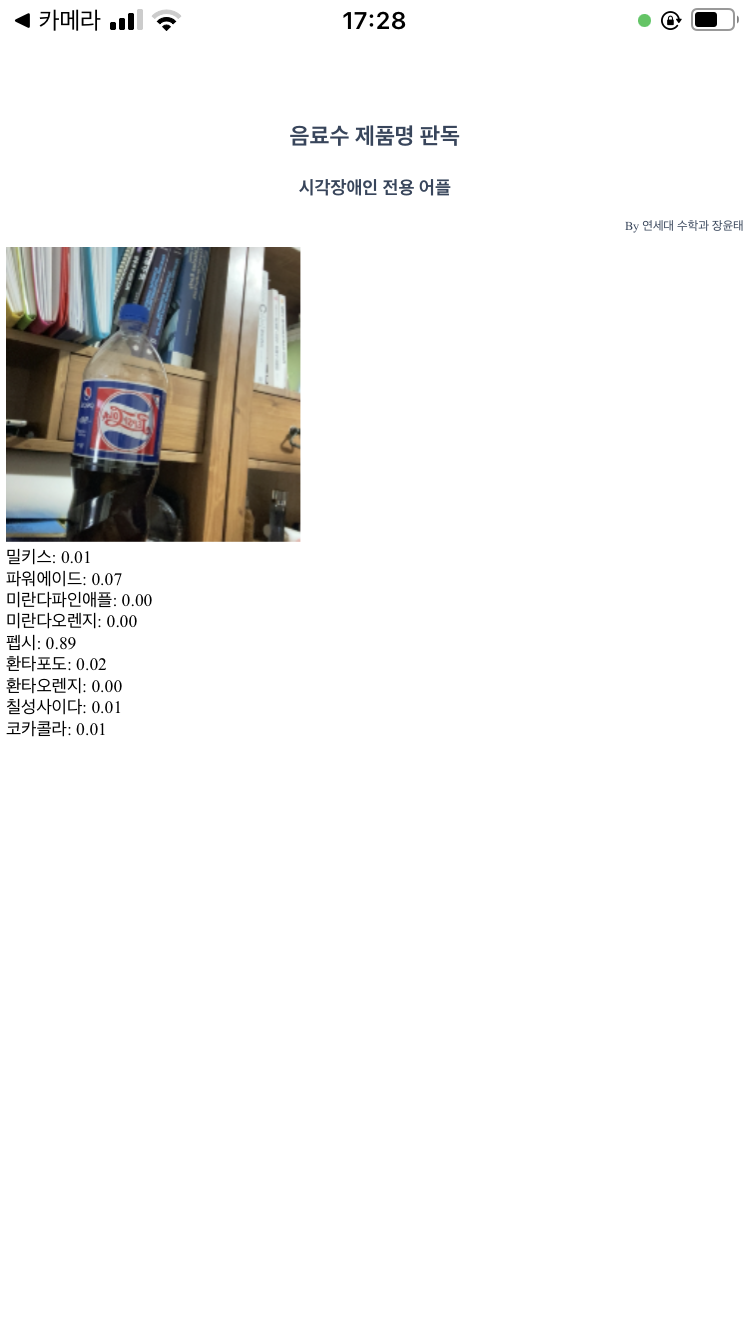